In [2]:
import warnings
warnings.filterwarnings('ignore')

import sqlalchemy 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from datetime import datetime


In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
    Base = automap_base()
    Base.prepare(engine, reflect=True)
    Base.classes.keys()

['measurement', 'station']

In [5]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session=Session(engine)


In [6]:
engine.execute('select * from measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-07', 0.06, 70.0)]

In [7]:
months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-09-01', '2017-08-31')).\
       group_by(Measurement.date).all()
months

[(datetime.date(2016, 9, 1), 0.01),
 (datetime.date(2016, 9, 2), 0.03),
 (datetime.date(2016, 9, 3), 1.0),
 (datetime.date(2016, 9, 4), 0.44),
 (datetime.date(2016, 9, 5), 0.18),
 (datetime.date(2016, 9, 6), 1.0),
 (datetime.date(2016, 9, 7), 1.35),
 (datetime.date(2016, 9, 8), 0.15),
 (datetime.date(2016, 9, 9), 0.35),
 (datetime.date(2016, 9, 10), 1.16),
 (datetime.date(2016, 9, 11), 0.6),
 (datetime.date(2016, 9, 12), 1.04),
 (datetime.date(2016, 9, 13), 1.2),
 (datetime.date(2016, 9, 14), 6.7),
 (datetime.date(2016, 9, 15), 3.35),
 (datetime.date(2016, 9, 16), 0.61),
 (datetime.date(2016, 9, 17), 0.23),
 (datetime.date(2016, 9, 18), 0.42),
 (datetime.date(2016, 9, 19), 0.25),
 (datetime.date(2016, 9, 20), 0.43),
 (datetime.date(2016, 9, 21), 1.02),
 (datetime.date(2016, 9, 22), 0.75),
 (datetime.date(2016, 9, 23), 0.33),
 (datetime.date(2016, 9, 24), 0.27),
 (datetime.date(2016, 9, 25), 0.04),
 (datetime.date(2016, 9, 26), 1.02),
 (datetime.date(2016, 9, 27), 1.0),
 (datetime.date(

In [8]:
months_df = pd.DataFrame(months)
months_df.head()

,date,prcp
0,2016-09-01,0.01
1,2016-09-02,0.03
2,2016-09-03,1.00
3,2016-09-04,0.44
4,2016-09-05,0.18


In [9]:
months_df.set_index('date', inplace=True, )
months_df.head(5)

,prcp
date,
2016-09-01,0.01
2016-09-02,0.03
2016-09-03,1.00
2016-09-04,0.44
2016-09-05,0.18


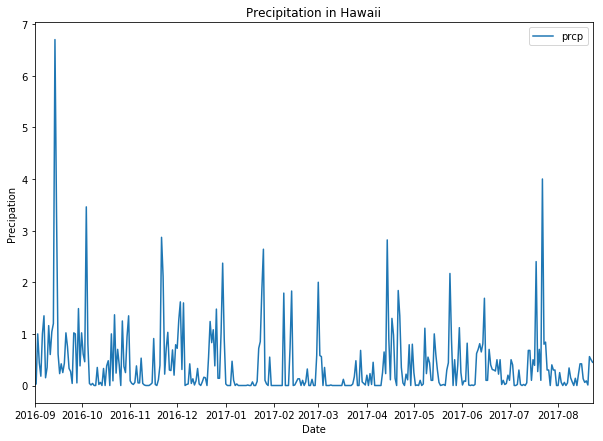

In [10]:
months_df.plot(figsize = (10,7), legend = True)

plt.ylabel('Precipation')
plt.xlabel('Date')
plt.title("Precipitation in Hawaii")

plt.savefig("Precipitation")

plt.show()

In [11]:
months_df = months_df.describe()
months_df

,prcp
count,357.000000
mean,0.402941
std,0.681194
min,0.000000
25%,0.000000
50%,0.120000
75%,0.530000
max,6.700000


In [12]:
#Stations

In [13]:
station_count = session.query(Station.station).count()
station_count

9

In [14]:
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
                                 group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [15]:
print("USC00519281 is the most active station")

USC00519281 is the most active station


In [16]:
active_tob = session.query(Measurement.station, Measurement.tobs).\
                                   filter(Measurement.date.between('2016-0901', '2017-08-31')).\
                                   filter(Measurement.station == "USC00519281").all()
active_tob

[('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 76.0),
 ('USC00519281', 73.0),
 ('USC00519281', 72.0),
 ('USC00519281', 71.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 74.0),
 ('USC00519281', 75.0),
 ('USC00519281', 76.0),
 ('USC00519281', 73.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 76.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 75.0),
 ('USC00519281', 75.0),
 ('USC00519281', 75.0),
 ('USC00519281', 75.0),
 ('USC00519281', 71.0),
 ('USC00519281', 63.0),
 ('USC00519281', 70.0),
 ('USC00519281', 68.0),
 ('USC00519281', 67.0),
 ('USC00519281',

In [17]:
tob_df = pd.DataFrame(active_tob)
tob_df.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,79.0
2,USC00519281,79.0
3,USC00519281,79.0
4,USC00519281,79.0


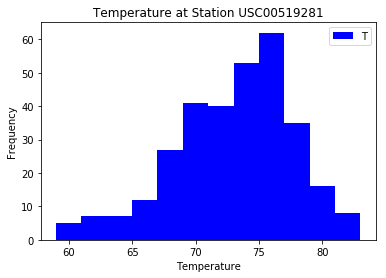

In [18]:
plt.hist(tob_df["tobs"], bins = 12, color="blue")
plt.title('Temperature at Station USC00519281')
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.legend("Tobs")
plt.show()

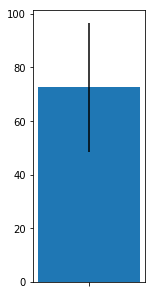

In [27]:
def calc_temps(start_date, mid_date, end_date,):
    trip_dates = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= start_date,\
         Measurement.date <= end_date).all()
    trip_dates_df = pd.DataFrame(trip_dates)
    max_temp = tob_df["tobs"].max()
    min_temp = tob_df["tobs"].min()
    mean_temp = tob_df["tobs"].mean()
    plt.figure(figsize=(2,5))
    plt.bar(1,mean_temp, yerr= max_temp - min_temp, tick_label="")
    plt.show()
calc_temps("2016-10-15", "2016-10-17", "2016-10-18")